# Sampling
Once we have a language model which, given a conditioning sequence, outputs a distribution over tokens for the next token, there are multiple ways to sample from it. The most common ways are implemented in this project in the `statapp.common.sampling` submodule.

In [35]:
import sys

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

sys.path.append("..")
from statapp.common.sampling import sample_from_distribution

%autoreload 2

## Sampling a single token
Several methods exist to process the conditional distribution output by the language model in order to choose the next token. The main methods are:

- **Temperature sampling**: Apply a transformation on probabilities before sampling based on some parameter T.
    Probabilities are transformed as: `p[i] = p[i]**(1/T) / sum(p).`
    T = 1 keeps the predictor's distribution intact.
    T -> 0 is equivalent to greedy sampling.
    T -> infinity is equivalent to uniform sampling from the vocabulary.
- **Penalized Sampling**: Apply a repetition penalty simultaneously with the temperature transform, penalizing tokens already present in the previous sequence more than those absent from it.
- **Top-K truncation**: Before sampling and after any probability transforms, keep only the K most probable candidates.
- **Nucleus sampling**: Instead of choosing K in advance, specify a probability threshold.
    Pick the smallest K such that `sum(sort_descending(p)[0:K]) >= threshold`.

Let's do a few tests of single token sampling methods and visualize the results.

We'll use [1, 2, 3, 4, 5, 6] (which will be automatically normalized) as the distribution to sample from.

In [36]:
def get_sampled_dist(n=10000, **kwargs):
    samples = []
    for i in tqdm(range(n)):
        sample = sample_from_distribution([1, 2, 3, 4, 5, 6], **kwargs)
        samples.append(sample)
    return pd.Series(samples)

### Effects of temperature

100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12440.14it/s]


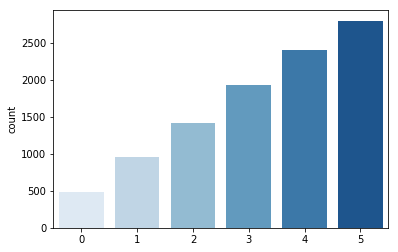

In [37]:
sns.set_palette("Blues")
sns.countplot(get_sampled_dist(10000, temperature=1, top_k=0))

100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13631.99it/s]


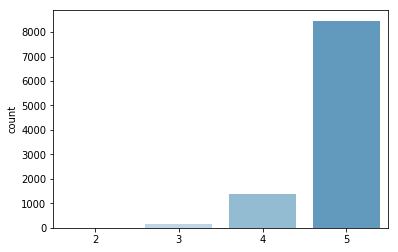

In [38]:
sns.countplot(get_sampled_dist(10000, temperature=0.1, top_k=0))

100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13351.26it/s]


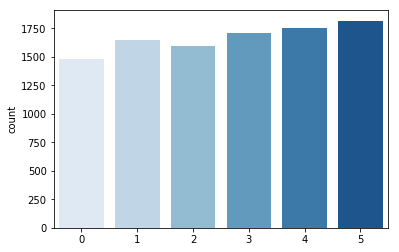

In [39]:
sns.countplot(get_sampled_dist(10000, temperature=10, top_k=0))

### Effects of top-K and nucleus truncation

100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13830.04it/s]


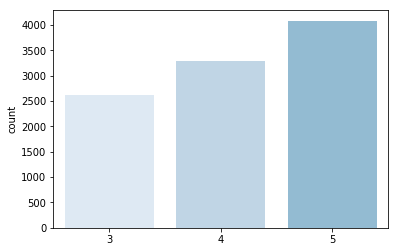

In [40]:
sns.countplot(get_sampled_dist(10000, temperature=1, top_k=3))

100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 11965.11it/s]


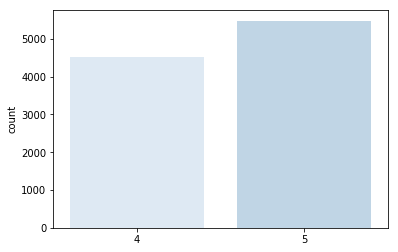

In [41]:
sns.countplot(get_sampled_dist(10000, temperature=1, proba_threshold=0.5))

### Effects of penalized sampling

100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12921.09it/s]


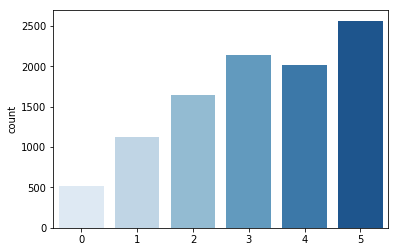

In [44]:
sns.countplot(get_sampled_dist(10000, temperature=1, top_k=0, previous_sequence=[4, 5, 4], repetition_penalty=1.2))